### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cleaning Data

In [3]:
data = pd.read_csv('./data/triage_classification.csv')
data['gender'] = pd.Series(['M' if val==1 else 'F' for val in data['gender']])
data.rename(columns= {'Unnamed: 0' : 'ID'}, inplace=True)
data['ID'] = pd.Series([val+1 for val in range(len(data['ID']))])
data['exercise angina'] = pd.Series(['Yes' if val==1 else 'No' for val in data['exercise angina']])
data['hypertension'] = pd.Series(['Yes' if val==1 else 'No' for val in data['hypertension']])
data['heart_disease'] = pd.Series(['Yes' if val==1 else 'No' for val in data['heart_disease']])


In [5]:
tdf = data.loc[data['triage']=='red']
tdf.head()

,ID,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
16,17,38.0,M,4.0,110.0,196.0,166.0,No,78.0,31.0,111.0,20.0,0.467386,No,No,Urban,never smoked,red
44,45,43.0,M,4.0,120.0,175.0,170.0,Yes,123.0,66.0,136.0,23.0,0.467386,No,No,Urban,never smoked,red
46,47,37.0,M,4.0,120.0,223.0,168.0,No,103.0,75.0,107.0,21.0,0.467386,No,No,Urban,never smoked,red
49,50,41.0,M,4.0,110.0,294.0,170.0,No,117.0,71.0,117.0,19.0,0.467386,No,No,Urban,never smoked,red
51,52,47.0,F,4.0,120.0,205.0,170.0,Yes,110.0,78.0,93.0,20.0,0.467386,No,No,Urban,never smoked,red


#### Data Meta Analysis

In [73]:
#data['triage'].value_counts()
#print(data['diabetes_pedigree'].min(),data['diabetes_pedigree'].max())
#data.shape

cont_cols = ['age', 'blood pressure', 'cholesterol', 'max heart rate', 'plasma glucose', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree']

#### Data Visualization & Analysis

<AxesSubplot: xlabel='triage', ylabel='blood pressure'>

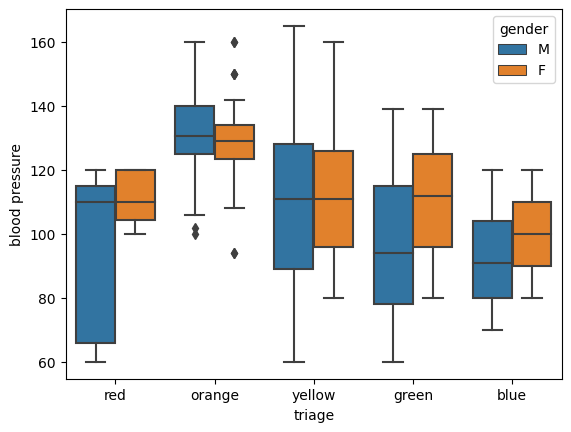

In [56]:
triage_order = ['red', 'orange', 'yellow', 'green', 'blue']
sns.boxplot(x='triage', y='blood pressure', data=data, hue='gender', order=triage_order)

<AxesSubplot: xlabel='triage', ylabel='cholesterol'>

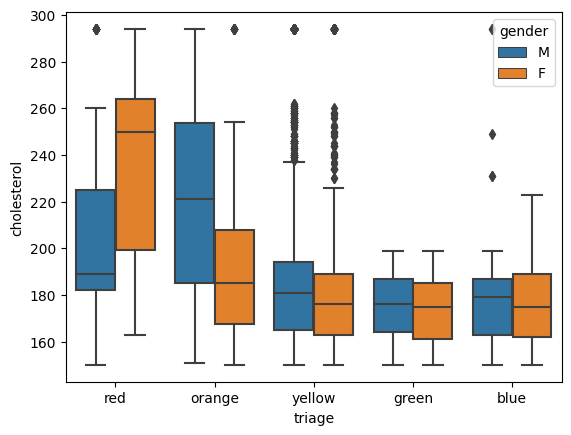

In [58]:
sns.boxplot(x='triage', y='cholesterol', data=data, hue='gender', order=triage_order)

<AxesSubplot: xlabel='triage', ylabel='blood pressure'>

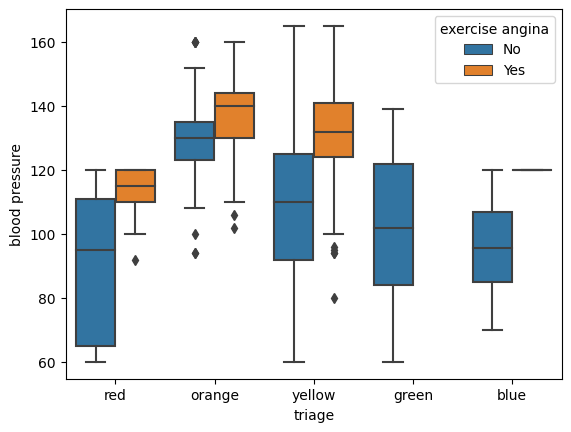

In [65]:
sns.boxplot(x='triage', y='blood pressure', data=data, hue='exercise angina', order=triage_order)

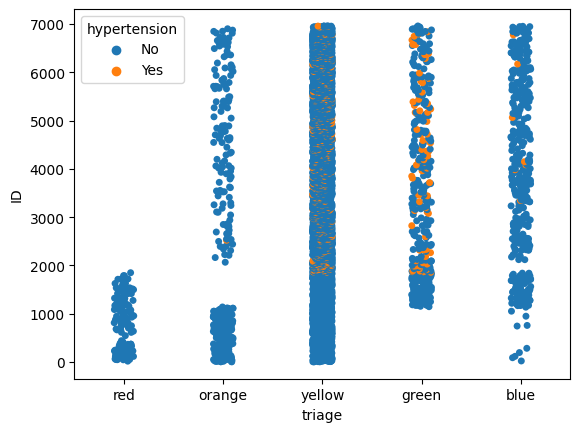

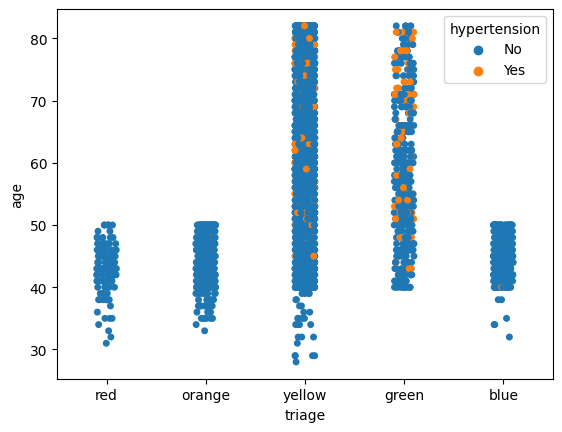

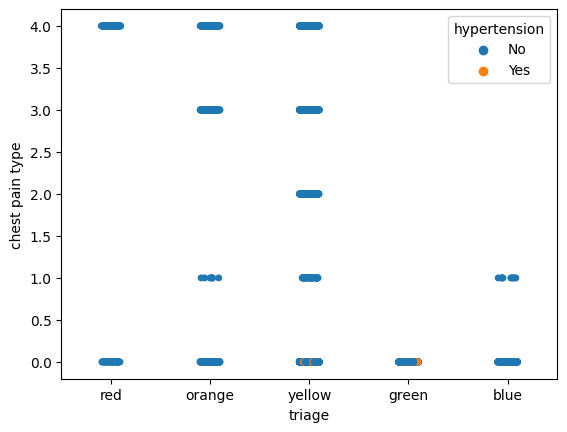

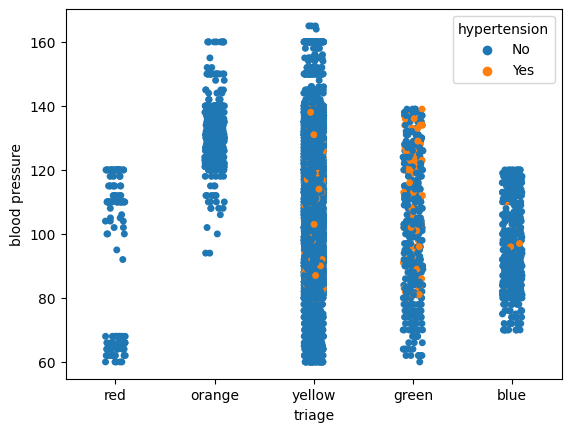

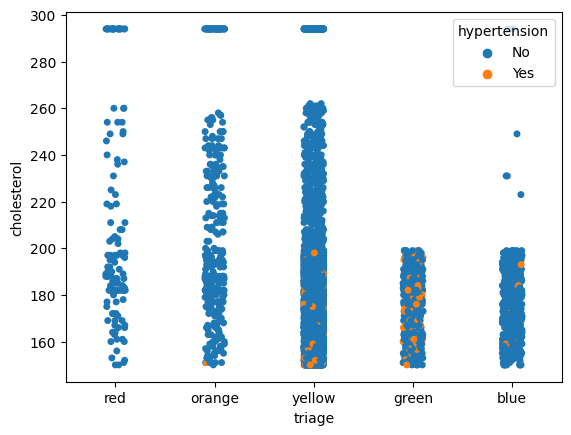

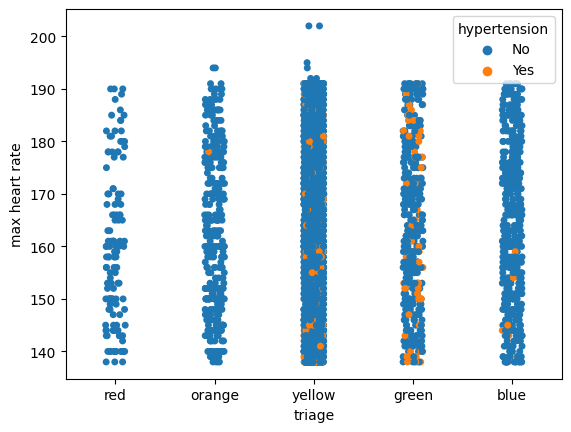

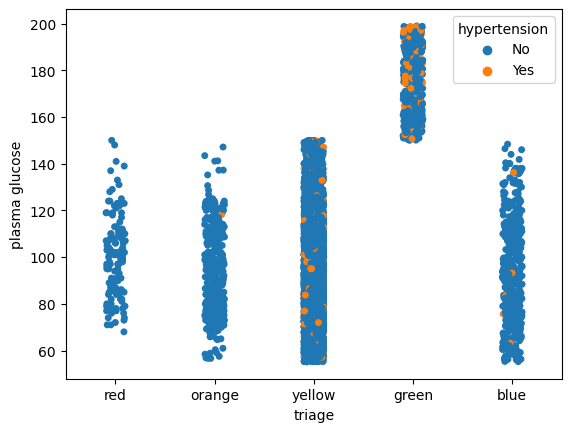

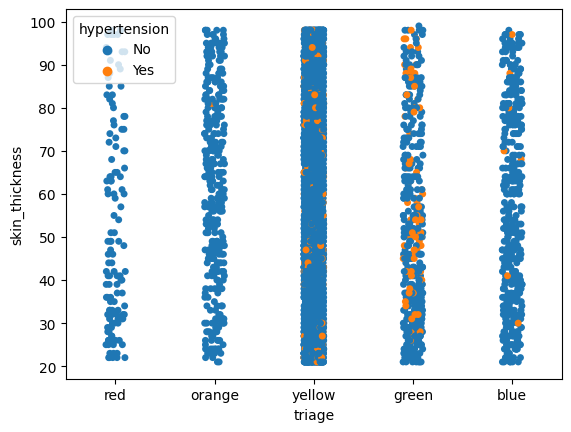

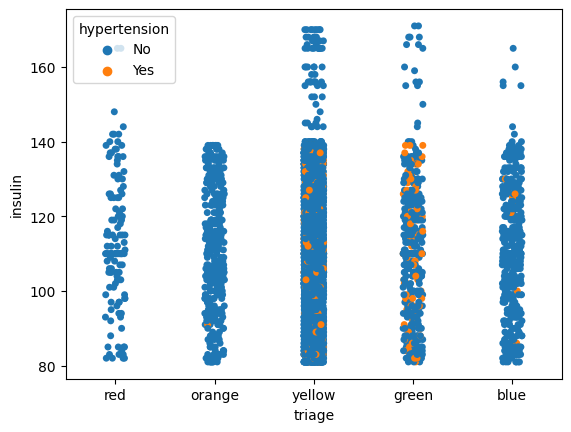

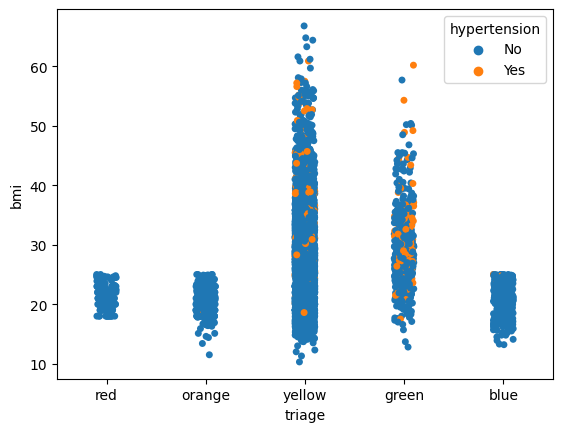

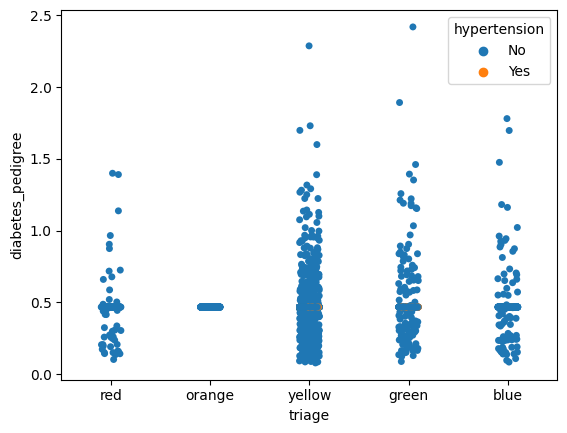

In [83]:
contdf = data.select_dtypes([int, float])

for i, col in enumerate(contdf.columns):
    plt.figure(i)
    sns.stripplot(x='triage', y=col, data=data, hue='hypertension', jitter=True, order=triage_order)

C:\Users\Ameer Hamza\AppData\Local\Temp\ipykernel_8584\3975752167.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_mx = data_mx.corr()


<AxesSubplot: >

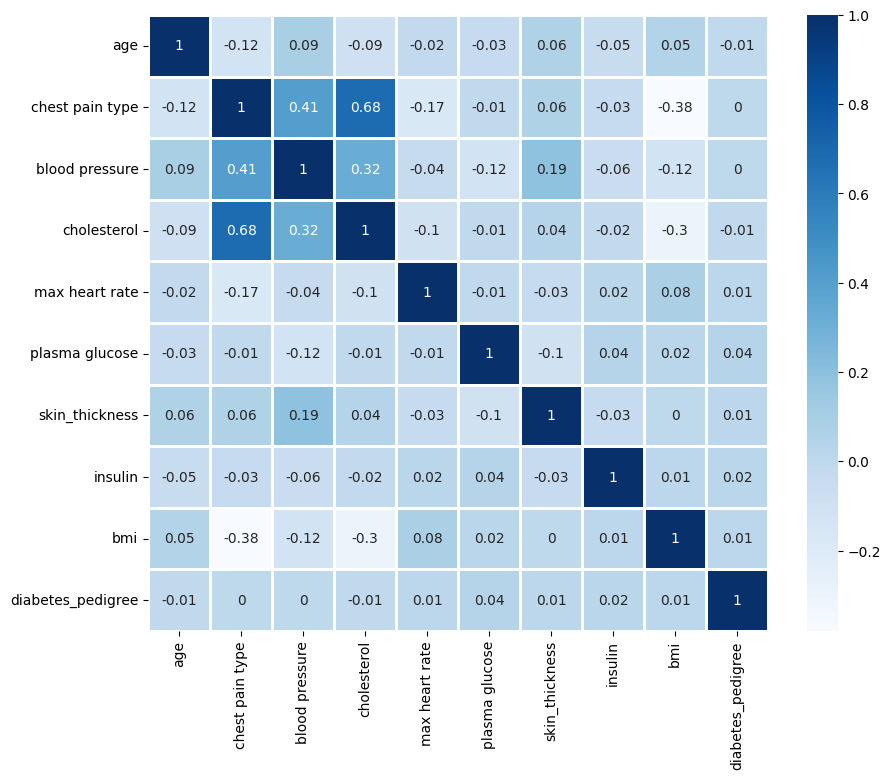

In [87]:
data_mx = data.drop('ID', axis=1)
data_mx = data_mx.corr()
data_mx = data_mx.round(2)
plt.figure(figsize=(10,8))
sns.heatmap(data_mx, annot=True, cmap='Blues', linecolor='white', linewidth=1)

<AxesSubplot: xlabel='blood pressure', ylabel='cholesterol'>

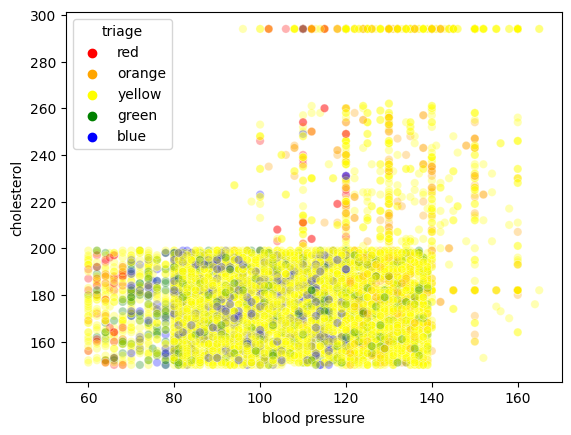

In [93]:
sns.scatterplot(x='blood pressure', y='cholesterol', data=data, hue='triage', hue_order=triage_order, palette=triage_order, alpha=0.3)

<AxesSubplot: xlabel='smoking_status', ylabel='Count'>

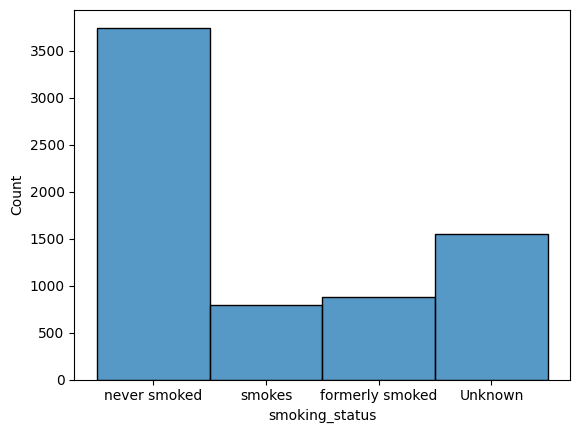

In [116]:
sns.histplot(x='smoking_status', data=data)